### 1. Load MNIST

In [55]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

print("Mnist has %d in training" % len(X_train))
print("Mnist has %d in test " % len(X_test))

(X_train_r,y_train_r),(X_test_r,y_test_r)=mnist.load_data()

Mnist has 60000 in training
Mnist has 10000 in test 


### 2. Visualize first 5 digits

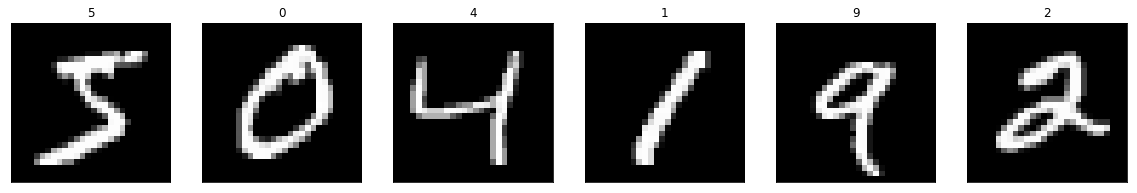

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(y_train[i])


### 3.Visualize in detail 

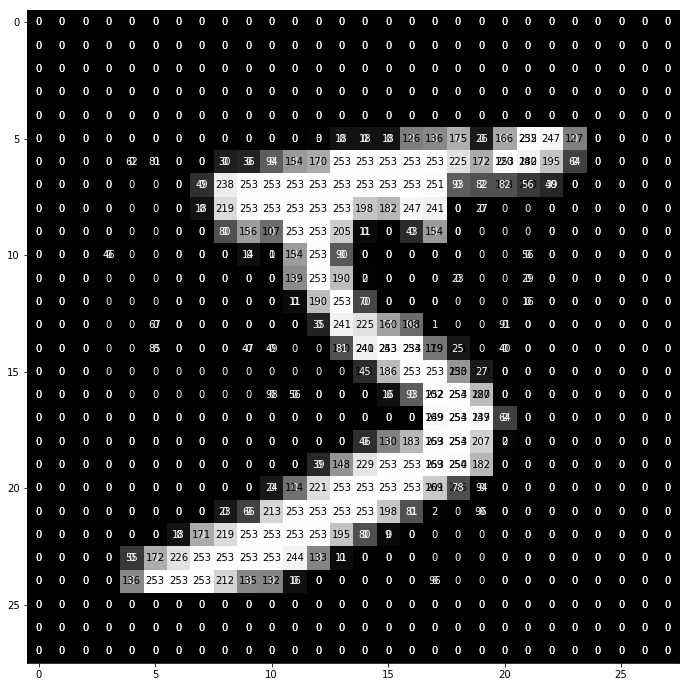

In [57]:
#In the following img is 28 by 28 matrix of pixels 
def visualize_input(img,ax):
    ax.imshow(img,cmap='gray')
    width,height=img.shape
    thresh=img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(img[x][y],
                        xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
visualize_input(X_train[0],ax)

###    Rescale images by divide every pixel/255

In [58]:
#rescale [0,255] --> [0,1]
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

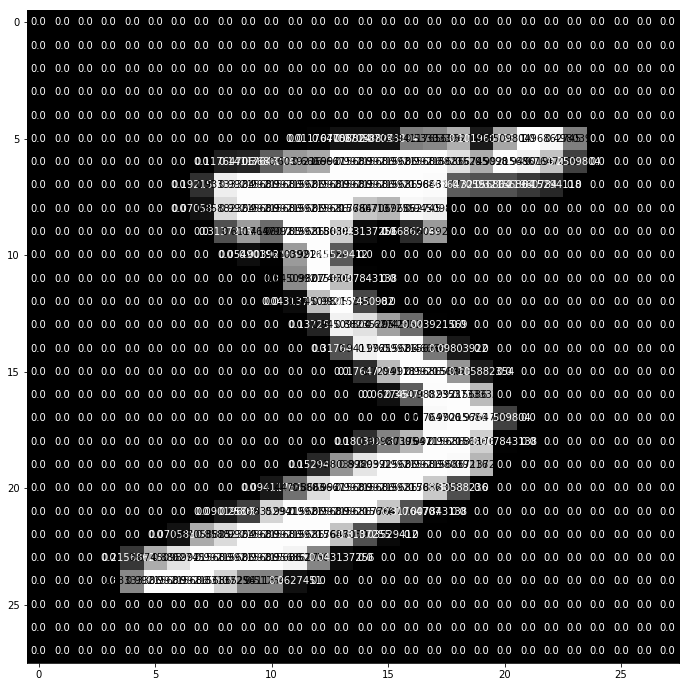

In [61]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
visualize_input(X_train[0],ax)

### 5 Encode categorical image labels

In [62]:
from keras.utils import np_utils

#print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

#one-hot encode the labels
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#print first ten (one-hot) training labels

print('One-hot labels')
print(y_train[:10])


Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [63]:
from keras.utils import normalize

#print(y_train[:2])
#print(y_train_r[:2])

print(y_train[:2])
print('----------')
print(y_train[:2].argmax(1))


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
----------
[5 0]


### 6 Define Model Architecture

In [64]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

print(X_train.shape)
print(X_train.shape[2:])


#define the model
model=Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

#summarize the model
model.summary()


(60000, 28, 28)
(28,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

### 7 Compile the model

In [65]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

### 8 Calculate classification accuracy

In [74]:
# evaluate test accuracy
score=model.evaluate(X_test,y_test,verbose=0)
accuracy=100*score[1]

#print test accuracy
print('Test accuracy: %.4f%%'%accuracy)

Test accuracy: 97.8900%


### 9 Train model

You can alter model save params by referring 
https://keras.io/callbacks/#modelcheckpoint

In [81]:
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer=ModelCheckpoint(filepath='mnist.weights.{epoch:02d}-{val_loss:.2f}.model.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[checkpointer],verbose=1,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 61us/step - loss: 0.0094 - acc: 0.9977 - val_loss: 0.1683 - val_acc: 0.9813

Epoch 00001: val_loss improved from inf to 0.16835, saving model to mnist.weights.01-0.17.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 3s 60us/step - loss: 0.0104 - acc: 0.9978 - val_loss: 0.1551 - val_acc: 0.9817

Epoch 00002: val_loss improved from 0.16835 to 0.15514, saving model to mnist.weights.02-0.16.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.0104 - acc: 0.9978 - val_loss: 0.1587 - val_acc: 0.9825

Epoch 00003: val_loss did not improve
Epoch 4/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.0119 - acc: 0.9975 - val_loss: 0.1599 - val_acc: 0.9827

Epoch 00004: val_loss did not improve
Epoch 5/10
48000/48000 [==============================] - 3s 61us/step - loss: 0.0089 - acc: 0.9980 - val_

### 10 Load the model with Best classification Accuracy on the validation set

In [76]:
model.load_weights('mnist.model.best.hdf5')

##### Note: 
While training accuracy is calculated based on predictions from train set , following evaluate method calculates based on test set

In [77]:
score=model.evaluate(X_test,y_test,verbose=0)
accuracy=100*score[1]

print('Test accuracy: %.4f%%'% accuracy)

Test accuracy: 98.1600%


### 11 Calculate the classification Accuracy on the Test set

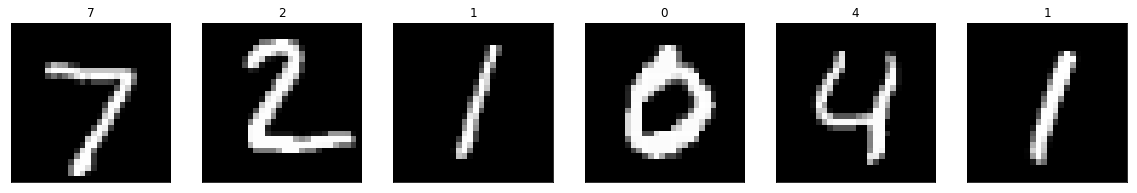

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_test[i],cmap='gray')
    ax.set_title(y_test_r[i])



### Prepare a list of  digits that are failed to be detected

In [70]:

import decimal

result=model.predict(X_test)

failed=[]

for i in range(X_test.shape[0:1][0]):
    if y_test_r[i]!=result[i].argmax():
         failed.append(i)

### Few failed  predictions

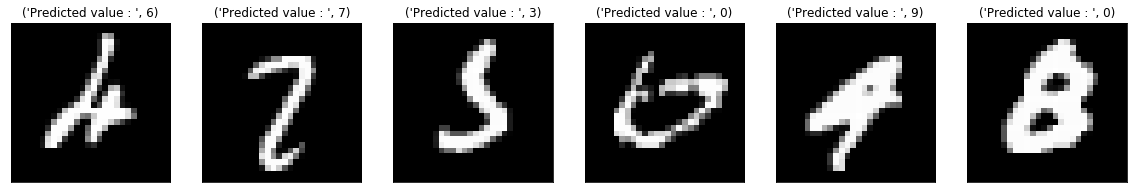

In [86]:

fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_test[failed[i]],cmap='gray')
    title='Predicted value : ',result[failed[i]].argmax()
    ax.set_title(title)


### Few successful predictions 

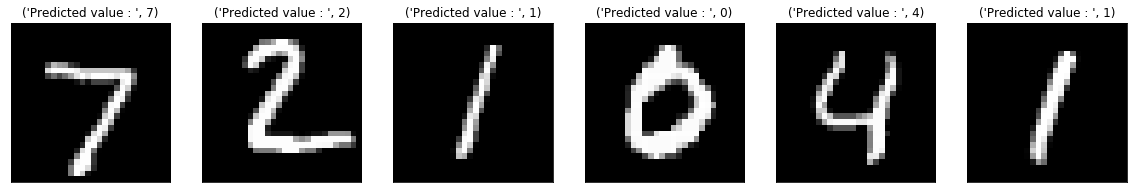

In [72]:
fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_test[i],cmap='gray')
    title='Predicted value : ',result[i].argmax()
    ax.set_title(title)